
---

# Keras

---

---
## Anatomy of a neural network in Keras

### Layers: The building blocks of deep learning

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
layer = layers.Dense(32, input_shape=(784, ))


In [3]:
model = keras.models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

In [4]:
model = keras.models.Sequential([layers.Dense(32, activation="relu"),
                           layers.Dense(32) ])

In [5]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])



**Optimizers:**
- SGD
- RMSprop
- Adam
- Adagrad
- etc.

**Losses:**
- MeanSquaredError
- CategoricalCrossentropy
- SparseCategoricalCrossentropy
- BinaryCrossentropy
- etc.

**Metrics:**
- Accuracy
- CategoricalAccuracy
- SparseCategoricalAccuracy
- BinaryAccuracy
- Precision
- Recall
- Etc.

In [6]:
##model.fit(inputs, 
          ##targets, 
          ##epochs=5, 
          ##batch_size=128 )

# inputs ->     The input examples, as a NumPy array
# targets ->    The corresponding training targets, as a NumPy array
# epochs ->     The training loop will iterate over the data 5 times
# batch_size -> The training loop will iterate over the data in batches of 128 examples.

---

## The Sequential model

In [7]:
# it’s possible to build the same model incrementally via the add() method

model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [8]:
# Sequential model does not have any weights until you actually call it on some data, 
# or call its build() method with an input shape

#model.weights

In [9]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_5/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.17775299,  0.10969096,  0.1729767 , -0.10762317,  0.01686597,
         -0.02742851,  0.04274973, -0.20283338,  0.14608607,  0.11451277,
          0.13340998, -0.10751858,  0.15302047,  0.25165665,  0.27835   ,
          0.27660322,  0.13757539, -0.16622674,  0.00835407, -0.20130691,
         -0.18297084,  0.06913874, -0.03632298,  0.2846216 , -0.1930834 ,
         -0.11969388,  0.03049433, -0.10994495, -0.01935634, -0.1186734 ,
          0.27612042,  0.12160319, -0.11552598,  0.21497262,  0.28489   ,
          0.03090921, -0.10223208, -0.14694595, -0.19523695, -0.22922474,
         -0.13604093,  0.20242167, -0.02352253,  0.2922638 ,  0.03939748,
         -0.14681895, -0.09727544,  0.05365506,  0.06303909, -0.25658783,
          0.15369377, -0.23062322,  0.00839531, -0.22111025,  0.02521926,
          0.28002024, -0.13926896, -0.2956345 ,  0.27138913,  0.19157547,
         -0.22566941, -0.06765106, -0.06817

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                256       
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(layers.Dense(10, activation="relu"))

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                256       
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [15]:
# simplest way
model = keras.Sequential([  layers.Dense(64, activation="relu"),
                            layers.Dense(10, activation="softmax") ])

---
## Exercise
### MNIST Example

The problem we’re trying to solve here is to classify grayscale images of handwritten
digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST
dataset, a classic in the machine learning community, which has been around almost
as long as the field itself and has been intensively studied. It’s a set of 60,000 training
images, plus 10,000 test images, assembled by the National Institute of Standards and
Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as
the “Hello World” of deep learning—it’s what you do to verify that your algorithms are
working as expected.

In [16]:
from tensorflow.keras.datasets import mnist

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
test_images.shape

(10000, 28, 28)

First, we’ll feed the neural network the training data,
train_images and train_labels. The network will then learn to associate images and
labels. Finally, we’ll ask the network to produce predictions for test_images, and we’ll
verify whether these predictions match the labels from test_labels.

Our training
images were stored in an array of shape (60000, 28, 28) of type uint8 with values
in the [0, 255] interval. We’ll transform it into a float32 array of shape (60000, 28 *
28) with values between 0 and 1.

In [20]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np

In [22]:
train_images[0].shape

(784,)

The core building block of neural networks is the layer.


In [186]:
# last layers activation = "softmax"
# is a 10-way softmax classification layer, which means it will return an array of 10 probability scores (summing to 1). 
# Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

model = keras.Sequential([  layers.Dense(126, activation="relu"),
                            layers.Dense(86, activation="relu"),
                            layers.Dense(64, activation="relu"),
                            layers.Dense(32, activation="relu"),
                            layers.Dense(20, activation="relu"),
                            layers.Dense(10, activation="softmax")    ])

In [187]:
model

In [188]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [196]:
%%time
model.fit(train_images, 
          train_labels, 
          epochs=5, 
          batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0516 - accuracy: 0.9842
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0438 - accuracy: 0.9872
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0358 - accuracy: 0.9892
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0308 - accuracy: 0.9910
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0265 - accuracy: 0.9917
Wall time: 3.75 s


In [197]:
# first ten test digits
test_digits = test_images[0:10]

In [198]:
predictions = model.predict(test_digits)
predictions[0]

array([8.2069818e-08, 1.3738282e-08, 1.0903760e-07, 4.8931083e-06,
       6.0360219e-09, 1.8388879e-07, 1.6583061e-13, 9.9994779e-01,
       4.4525198e-08, 4.6838813e-05], dtype=float32)

In [199]:
np.argmax(predictions[0])

7

In [200]:
from time import sleep

PREDICTION IS: 7


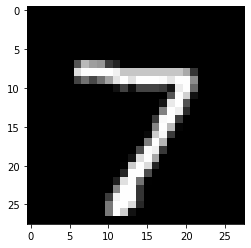

PREDICTION IS: 2


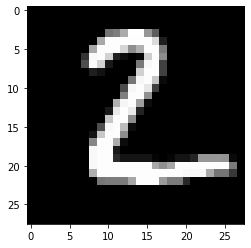

PREDICTION IS: 1


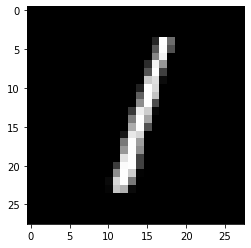

PREDICTION IS: 0


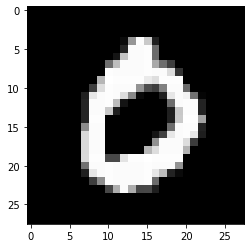

PREDICTION IS: 4


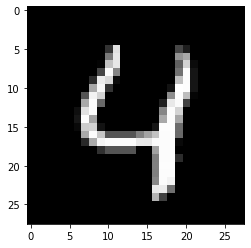

PREDICTION IS: 1


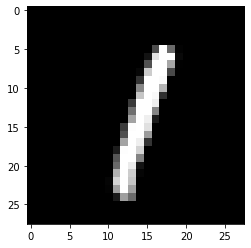

PREDICTION IS: 4


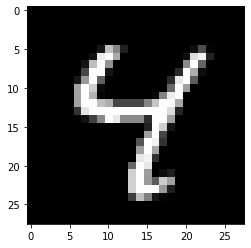

PREDICTION IS: 9


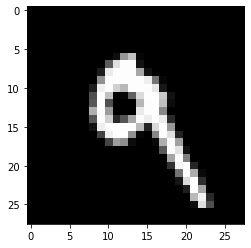

PREDICTION IS: 5


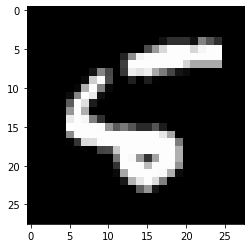

PREDICTION IS: 9


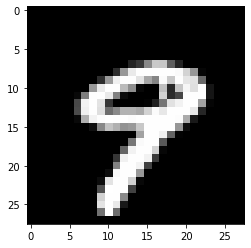

In [201]:
for i in range(10):
    print(f"PREDICTION IS: {np.argmax(predictions[i])}")
    plt.imshow(np.reshape(test_digits[i], (28,28)), cmap=plt.cm.gray);
    plt.show();
    sleep(1)

In [202]:
# 0.9789 

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 643us/step - loss: 0.0894 - accuracy: 0.9794
test_acc: 0.9793999791145325
